In [1]:
import math

def sigmoid(x):
    if x >= 0:
        return 1.0 / (1.0 + math.exp(-x))
    else:
        exp_x = math.exp(x)
        return exp_x / (1.0 + exp_x)


# Update the forward propagation function to use the updated sigmoid function
def forward_propagation(x, A, B, C):
    # Compute y, u, v, z, w, and L
    y = [sum(A[i][j] * x[j] for j in range(len(x))) for i in range(len(A))]
    u = [sigmoid(y_i) for y_i in y]
    v = [sum(B[i][j] * x[j] for j in range(len(x))) for i in range(len(B))]
    z = [u_i + v_i for u_i, v_i in zip(u, v)]
    w = [sum(C[i][j] * z_j for j, z_j in enumerate(z)) for i in range(len(C))]
    L = sum(w_i * w_i for w_i in w)
    return y, u, v, z, w, L

# Example usage
x_example = [1.0, 2.0, 3.0]  # Replace with your input vector
A_example = [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]]  # Replace with your A matrix
B_example = [[0.2, 0.4, 0.6], [0.8, 1.0, 1.2], [1.4, 1.6, 1.8]]  # Replace with your B matrix
C_example = [[0.3, 0.6, 0.9], [1.2, 1.5, 1.8], [2.1, 2.4, 2.7]]  # Replace with your C matrix

y, u, v, z, w, L = forward_propagation(x_example, A_example, B_example, C_example)
print("Forward Propagation Results:")
print("y:", y)
print("u:", u)
print("v:", v)
print("z:", z)
print("w:", w)
print("L:", L)


Forward Propagation Results:
y: [1.4, 3.1999999999999997, 5.0]
u: [0.8021838885585817, 0.9608342772032357, 0.9933071490757153]
v: [2.8, 6.3999999999999995, 10.0]
z: [3.6021838885585815, 7.360834277203235, 10.993307149075715]
w: [15.391132167057659, 35.15182495041144, 54.91251773376521]
L: 4487.922350589284


In [2]:
def backward_propagation(x, A, B, C, y, u, v, z, w):
    # Compute gradients ∂L/∂A, ∂L/∂B, ∂L/∂C
    dL_dw = [2 * w_i for w_i in w]
    dL_dz = [sum(C[i][j] * dL_dw[i] for i in range(len(C))) for j in range(len(z))]
    dL_du = [dL_dz_i * sigmoid(y_i) * (1 - sigmoid(y_i)) for y_i, dL_dz_i in zip(y, dL_dz)]
    
    dL_dA = [[dL_du[i] * A[i][j] * x[j] for j in range(len(x))] for i in range(len(A))]
    dL_dB = [[dL_dz[i] * x[j] for j in range(len(x))] for i in range(len(B))]
    dL_dC = [[dL_dw[i] * z[j] for j in range(len(z))] for i in range(len(C))]
    
    return dL_dA, dL_dB, dL_dC

# Example usage
dL_dA, dL_dB, dL_dC = backward_propagation(x_example, A_example, B_example, C_example, y, u, v, z, w)
print("\nBackward Propagation Results (Gradients):")
print("∂L/∂A:", dL_dA)
print("∂L/∂B:", dL_dB)
print("∂L/∂C:", dL_dC)



Backward Propagation Results (Gradients):
∂L/∂A: [[5.145066355265455, 20.58026542106182, 46.30559719738909], [5.8329982258113375, 14.582495564528342, 26.248492016151012], [2.0977593299053936, 4.7948784683551855, 8.091357415349375]]
∂L/∂B: [[324.23163366303595, 648.4632673260719, 972.6949009891079], [387.50491857377654, 775.0098371475531, 1162.5147557213295], [450.7782034845171, 901.5564069690342, 1352.3346104535512]]
∂L/∂C: [[110.88337663770164, 226.58314644048664, 338.39888656896835], [253.2466749796073, 517.4935160024728, 772.8696170608323], [395.6099733215129, 808.403885564459, 1207.3403475526961]]


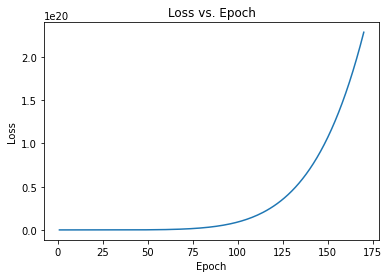

In [4]:
import matplotlib.pyplot as plt

def gradient_descent(A, B, C, dL_dA, dL_dB, dL_dC, learning_rate=0.01, num_epochs=100):
    # Initialize a list to store the loss at each iteration
    loss_history = []
    
    for epoch in range(num_epochs):
        # Compute L and gradients
        _, _, _, _, _, L = forward_propagation(x_example, A, B, C)
        dL_dA, dL_dB, dL_dC = backward_propagation(x_example, A, B, C, y, u, v, z, w)
        
        # Update A, B, C using gradient descent
        A = [[A[i][j] - learning_rate * dL_dA[i][j] for j in range(len(A))] for i in range(len(A))]
        B = [[B[i][j] - learning_rate * dL_dB[i][j] for j in range(len(B))] for i in range(len(B))]
        C = [[C[i][j] - learning_rate * dL_dC[i][j] for j in range(len(C))] for i in range(len(C))]
        
        # Append the loss to the loss history
        loss_history.append(L)
    
    return A, B, C, loss_history

# Example usage with 1000 epochs
num_epochs = 1000
A_new, B_new, C_new, loss_history = gradient_descent(A_example, B_example, C_example, dL_dA, dL_dB, dL_dC, num_epochs=num_epochs)

# Plot loss value vs. epoch
plt.plot(range(1, num_epochs + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()
